In [24]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

%matplotlib inline

In [3]:
train = datasets.CIFAR10(root='./data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.CIFAR10(root='./data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [121]:
train_set = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [6]:
train_set

In [7]:
for data in train_set:
  print(data)
  break

[tensor([[[[0.3176, 0.3216, 0.3137,  ..., 0.2078, 0.1529, 0.1804],
          [0.3020, 0.2824, 0.2549,  ..., 0.2196, 0.2588, 0.2706],
          [0.3098, 0.3216, 0.3373,  ..., 0.1725, 0.1529, 0.1412],
          ...,
          [0.0235, 0.0235, 0.0118,  ..., 0.8980, 0.8353, 0.8667],
          [0.0078, 0.0039, 0.0078,  ..., 0.9176, 0.8784, 0.8745],
          [0.0000, 0.0039, 0.0235,  ..., 0.8941, 0.8941, 0.8941]],

         [[0.3098, 0.3137, 0.3059,  ..., 0.1961, 0.1412, 0.1725],
          [0.2941, 0.2745, 0.2471,  ..., 0.2078, 0.2471, 0.2627],
          [0.3020, 0.3137, 0.3294,  ..., 0.1608, 0.1451, 0.1333],
          ...,
          [0.0235, 0.0235, 0.0118,  ..., 0.8941, 0.8275, 0.8627],
          [0.0078, 0.0039, 0.0078,  ..., 0.9137, 0.8745, 0.8706],
          [0.0000, 0.0039, 0.0235,  ..., 0.8902, 0.8941, 0.8941]],

         [[0.3608, 0.3647, 0.3569,  ..., 0.2784, 0.2157, 0.2314],
          [0.3451, 0.3255, 0.2980,  ..., 0.2824, 0.3137, 0.3176],
          [0.3529, 0.3647, 0.3804,  ..., 

In [18]:
x = data[0][0]
y = data[1][11]

print(y)

tensor(1)


In [61]:
def imshow(img):
    img = img     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [62]:
dataiter = iter(train_set)
images, labels = dataiter.next()

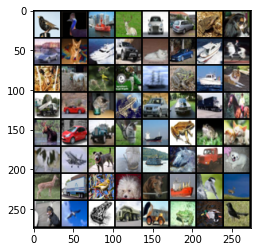

In [63]:
imshow(torchvision.utils.make_grid(images))

In [106]:
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 1000)
    self.fc2 = nn.Linear(1000, 1000)
    self.fc3 = nn.Linear(1000, 1000)
    self.fc4 = nn.Linear(1000, 50)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim = 1)

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=3072, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50, bias=True)
)


In [107]:
x_input = torch.rand(32,32,3)

In [108]:
x_input = x_input.view(-1, 32*32*3)

In [109]:
output = model(x_input)

In [110]:
output

tensor([[-3.9408, -3.9414, -3.9053, -3.8994, -3.9412, -3.8997, -3.8961, -3.9473,
         -3.9492, -3.8913, -3.9268, -3.8997, -3.9032, -3.9397, -3.9039, -3.8893,
         -3.8839, -3.9207, -3.8677, -3.8985, -3.9130, -3.9484, -3.8895, -3.8979,
         -3.8845, -3.9264, -3.8953, -3.9548, -3.8802, -3.9226, -3.9517, -3.9516,
         -3.9525, -3.9221, -3.9119, -3.8666, -3.9076, -3.9453, -3.9207, -3.9708,
         -3.8856, -3.8446, -3.8885, -3.8756, -3.9100, -3.9097, -3.8634, -3.9663,
         -3.9087, -3.9108]], grad_fn=<LogSoftmaxBackward>)

In [115]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

EPOCHS = 10

for epoch in range(EPOCHS):
  for data in train_set:
    x_input, y = data
    model.zero_grad()
    output = model(x_input.view(-1, 32*32*3))
    loss = F.cross_entropy(output, y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(0.8356, grad_fn=<NllLossBackward>)
tensor(0.9509, grad_fn=<NllLossBackward>)
tensor(0.9374, grad_fn=<NllLossBackward>)
tensor(1.6623, grad_fn=<NllLossBackward>)
tensor(1.1901, grad_fn=<NllLossBackward>)
tensor(1.0844, grad_fn=<NllLossBackward>)
tensor(0.8244, grad_fn=<NllLossBackward>)
tensor(0.9922, grad_fn=<NllLossBackward>)
tensor(1.0878, grad_fn=<NllLossBackward>)
tensor(0.8870, grad_fn=<NllLossBackward>)


In [116]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_set:
    x_input, y = data
    output = model(x_input.view(-1, 32*32*3))

    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print(correct, total)

35466 50000


In [136]:
Accuracy = correct/total *100
print('Accuracy score = ', Accuracy)

Accuracy score =  70.93199999999999


In [118]:
x_input

tensor([[[[0.1216, 0.1098, 0.1098,  ..., 0.1098, 0.1608, 0.1373],
          [0.1255, 0.1333, 0.1451,  ..., 0.1451, 0.2275, 0.2039],
          [0.1373, 0.1412, 0.1490,  ..., 0.1882, 0.2784, 0.2627],
          ...,
          [0.2784, 0.2784, 0.2784,  ..., 0.3098, 0.3255, 0.3608],
          [0.2667, 0.2549, 0.2706,  ..., 0.3020, 0.3333, 0.3216],
          [0.2549, 0.2196, 0.2549,  ..., 0.3843, 0.4039, 0.2941]],

         [[0.0941, 0.0824, 0.0824,  ..., 0.0941, 0.1490, 0.1255],
          [0.0902, 0.0980, 0.1098,  ..., 0.1216, 0.2118, 0.1882],
          [0.1020, 0.1059, 0.1137,  ..., 0.1647, 0.2588, 0.2392],
          ...,
          [0.2157, 0.2157, 0.2157,  ..., 0.2588, 0.2706, 0.3059],
          [0.2039, 0.1922, 0.2078,  ..., 0.2471, 0.2745, 0.2667],
          [0.1922, 0.1569, 0.1922,  ..., 0.3333, 0.3490, 0.2431]],

         [[0.0706, 0.0588, 0.0588,  ..., 0.0745, 0.1216, 0.0980],
          [0.0627, 0.0706, 0.0824,  ..., 0.1020, 0.1882, 0.1608],
          [0.0706, 0.0745, 0.0824,  ..., 0

In [122]:
dataiter = iter(test_set)
images, labels = dataiter.next()

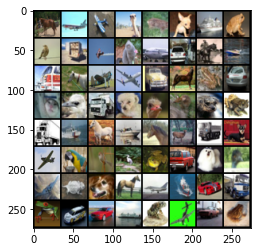

In [123]:
imshow(torchvision.utils.make_grid(images))

In [133]:
print(torch.argmax(model(x_input[2].view(-1, 32*32*3))[0]))

tensor(8)
